In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
def get_human_dataset():
    
    feature_name_df=pd.read_csv('./human_activity/features.txt',sep='\s+',header=None, names=['column_index','column_name'])
    feature_name = feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None, names=['action'])
    
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [6]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9107567017305734

In [7]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20],
}

rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 8,
  'n_estimators': 100},
 0.9166213275299239)

In [13]:
#best parameters, n_estimators=300으로 학습
rf_clf1 = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=8,min_samples_split=8,
                                 random_state=0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
accuracy_score(y_test,pred)

0.9165252799457075

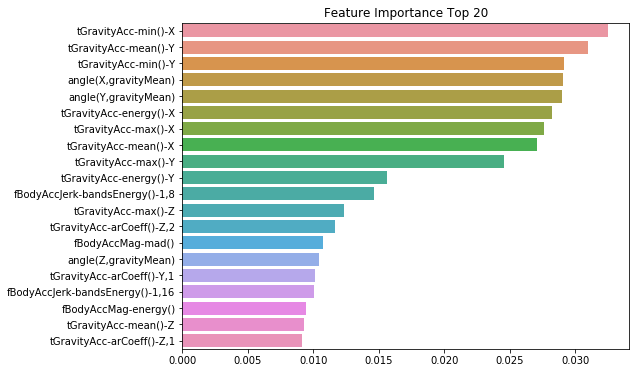

In [16]:
#feature importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importance = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("Feature Importance Top 20")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()